# Perkenalan

**Nama**    : **Ahmad Qais Alfiansyah**  
**Batch**   : **RMT-027**  
**Project** : **Graded Challenge 5**  

<hr>

## Latar Belakang Masalah

Saya diminta untuk memprediksi apakah nasabah salah satu penerbit kartu kredit akan terkena default atau tidak. Saya diberikan sebuah dataset nasabah-nasabah dengan keterangan pembayaran tagihan selama 6 bulan terakhir.  

Saya membuat beberapa model klasifikasi seperti Logistic Regression, SVM, dan KNN. Model-model tersebut saya akan dievaluasi oleh metode evaluasi yang tidak terpengaruh dengan imbalance data. Karena data yan dimiliki imbalance.  

Adapun dataset yang saya gunakan diambil dari Google Big Query. Saya akan mulai mengerjakannya.

## Conceptual Problems:

<blockquote>
Apakah yang dimaksud dengan coeficient pada logistic regression?
</blockquote><br>
Coeficient pada Logistic Regression<br>
<pr> Sesuai dengan namanya Koefisien berarti sebuah nilai. Dalam konteks regresi khususnya logistic regression, berarti koefisien adalah nilai-nilai yang ada pada fitur atau variabel X. Koefisien adalah penentu dari hasil y label atau nilai yang mau diprediksi.<br><br>
Yang saya ketahui Koefisien terbagi menjadi 2 yaitu koefisien positif dan negatif. Koefisien positif berarti peningkatannya menentukan hasil label yang positif, dan sebaliknya.</p>


<blockquote>
Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
</blockquote><br>
Parameter kernel adalah sebuah fungsi yang membuat input data menjadi bentuk data yang kita inginkan. Ada 3 macam kernel yang populer:
<ol>
    <li>Linear Kernel</li>
    Digunakan ketika data kita mempunyai data linearly separable (Terpisah Dimensi)
    <li>Polynomial Kernel</li>
    Digunakan ketika data kita tidak linearly separable.
    <li>RBF Kernel</li>
    Adalah kernel yang paling umum digunakan ketika kita tidak memiliki cukup domain knowledge terhadap distribusi data. Cocok untuk data yang ada outliers
</ol>

<blockquote>
Bagaimana cara memilih `K` yang optimal pada KNN ?
</blockquote><br>
Berikut adalah point-point yang saya pahami terkait dengan K Value:
<ol>
    <li>Tidak ada nilai baku menentukan K Value, semua tergantung fitur, distribusi data, outliers, dll</li>
    <li>Semakin kecil K value cenderung overfit dan sebaliknya</li>
    <li>Caranya adalah tes 1 per satu nilai K atau dengan bantuan visualisasi plot errors rate vs K. Ambil K value dengan nilai tertinggi tetapi masih good fit</li>
    <li>Sebisa mungkin K-Value angka ganjil untuk menghindari tie</li>
</ol>

<blockquote>
Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?
</blockquote><br>
Berikut adalah Metrics yang dipergunakan dalam mengevaluasi model:</li>
<ol>
    <li>metrics Accuracy</li>
    Salah satu metrics yang muncul dalam classification report. Metrics ini mengevaluasi berapa banyak prediksi yang benar mneggunakan skala 0 - 1. Semakin tinggi semakin bagus. Artinya semakin sedikit kesalahan prediksi oleh model. Metrics ini dipergunakan ketika kelas seimbang antara True/Positive
    <li>Precision</li>
    Ini juga merupakan salah satu metrics yang muncul dalam classification report. Berbeda dengan Accuracy, metrics ini mengevaluasi seberapa sering model memprediksi True Positif artinya menjawab positif dan benar. metrics ini juga menggunakan skala 0-1, semakin tinggi, semakin baik. Contoh: penggunaan fingerprint untuk akses masuk. Kita tentu tidak ingin model salah memprediksi orang yang masuk, jadi ini digunakan untuk menghindari False Positive.
    <li>Recall</li>
    Metrics ini juga disebut True Positive Rate (TPR). Metrics ini mengukur seberapa sering model memprediksi positif dari semua jawaban yang benar-benar positif (True Positif). Metrics ini berguna jika kita ingin nghindari False Negative. Contoh: Prediksi sesorang hamil atau tidak. Tentu jangan sampai Model mendapatkan hasil False Negative (Memprediksi tidak hamil untuk orang yang sebenarnya hamil)
    <li>F1 Score</li>
    Sama seperti ke 3 point di atas, Metrics ini lebih reliable jika dibandingakan dengan Accuracy. Itu karena metrics ini mengukur harmonic mean dai preicision dan recall. Metrics ini digunakan jika kita tidak memiliki tendensi (netral) terhadap hasil. Bisa digunakan untuk imbalance class
</ol>
<ol>


# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import pickle

# Query SQL

Melakukan Query dari Google Big Query

In [2]:
# from google.colab import auth
# from google.cloud import bigquery

# auth.authenticate_user()

# project_id = "river-nation-405906" # <- your project id
# client = bigquery.Client(project=project_id)

Saya melakukan penggantian nama kolom sesuqi requirement, pada tahap query.

In [3]:
# BATCH= 27
# YOD= 1993
# LIMIT_DATA= BATCH*YOD
# print(f"Data diminta untuk dibatasi sebanyak: {BATCH*YOD} Entries\n")

# df = client.query('''
# SELECT
#     limit_balance,
#     CAST(sex AS INT64) AS sex,
#     CAST(education_level AS INT64) AS education_level,
#     CAST(marital_status AS INT64) AS marital_status,
#     age, pay_0, pay_2, pay_3, pay_4,
#     CAST(pay_5 AS FLOAT64) AS pay_5,
#     CAST(pay_6 AS FLOAT64) AS pay_6,
#     bill_amt_1, bill_amt_2, bill_amt_3,
#     bill_amt_4, bill_amt_5, bill_amt_6,
#     pay_amt_1, pay_amt_2, pay_amt_3,
#     pay_amt_4, pay_amt_5, pay_amt_6,
#     CAST(default_payment_next_month AS INT64) AS default_payment_next_month
# FROM `bigquery-public-data.ml_datasets.credit_card_default`
# LIMIT 53811
# ''').to_dataframe()

# print(f"Jumlah entries asli dataset hanya mencapai: {len(df)} Entries\n{'='*56}\n")
# print(df.dtypes, df.shape)

Selanjutnya saya simpan ke file csv suoaya lebih mudah load data kedepannya.

In [4]:
# df.to_csv('P1G5_Set_1_ahmad_qais.csv', index=False)

# Data Loading

## Read .csv & Maksimalkan tampilan kolom

Saya buka kembali file csv yang baru saja saya buat di atas.

In [5]:
df= pd.read_csv('P1G5_Set_1_ahmad_qais.csv')
pd.set_option('display.max_columns',100)

## Menampilkan 10 Baris Pertama dan Terakhir

Sekarang saya akan menampilkan 10 baris pertama dan terakhir dataset

In [6]:
pd.concat([df.head(10), df.tail(10)])

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


## Informasi Dataset

Selanjutnya di sini saya mencoba menampilkan informasi Dataset dengan menggunakan keyword .info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Terlihat dataset memiliki jumlah kolom sebanyak 24 kolom di antara:  
- float64 (20 kolom)  
- int64 (4 kolom)  
- object (Tidak ada)  

Namun ada beberapa kolom yang tersembunyi. Maka saya akan split menjadi 2 bagian berdasarkan Data Interger dan Float untuk mendapatkan gambaran yang lebih rinci lagi

### Pembagian Info Kolom berdasarkan Datatype

In [8]:
int_col= df.select_dtypes(include= ['int'])
flt_col= df.select_dtypes(exclude= ['int'])

Saya akan menggunakan variabel sementara tersebut. Selanjutnya, saya akan menampilkan kembali informasi dari dataset.

# Cek info Dataset Berdasarkan Tipe Data

In [9]:
int_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   sex                         2965 non-null   int64
 1   education_level             2965 non-null   int64
 2   marital_status              2965 non-null   int64
 3   default_payment_next_month  2965 non-null   int64
dtypes: int64(4)
memory usage: 92.8 KB


In [10]:
flt_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   limit_balance  2965 non-null   float64
 1   age            2965 non-null   float64
 2   pay_0          2965 non-null   float64
 3   pay_2          2965 non-null   float64
 4   pay_3          2965 non-null   float64
 5   pay_4          2965 non-null   float64
 6   pay_5          2965 non-null   float64
 7   pay_6          2965 non-null   float64
 8   bill_amt_1     2965 non-null   float64
 9   bill_amt_2     2965 non-null   float64
 10  bill_amt_3     2965 non-null   float64
 11  bill_amt_4     2965 non-null   float64
 12  bill_amt_5     2965 non-null   float64
 13  bill_amt_6     2965 non-null   float64
 14  pay_amt_1      2965 non-null   float64
 15  pay_amt_2      2965 non-null   float64
 16  pay_amt_3      2965 non-null   float64
 17  pay_amt_4      2965 non-null   float64
 18  pay_amt_

Terlihat Sex, Education Level, Marital Status bertipe Interger yang seharusnya adalah berupa keterangan dan berbentuk Object. Mungkin ini adalah data yang sudah dilakukan encoding sebelumnya. Saya akan cek pada tahap EDA perihal data uniknya 

## Cek Data Unik Setiap Kolom Berdasarkan Tipe Data

Saya akan cek data unik setiap kolom

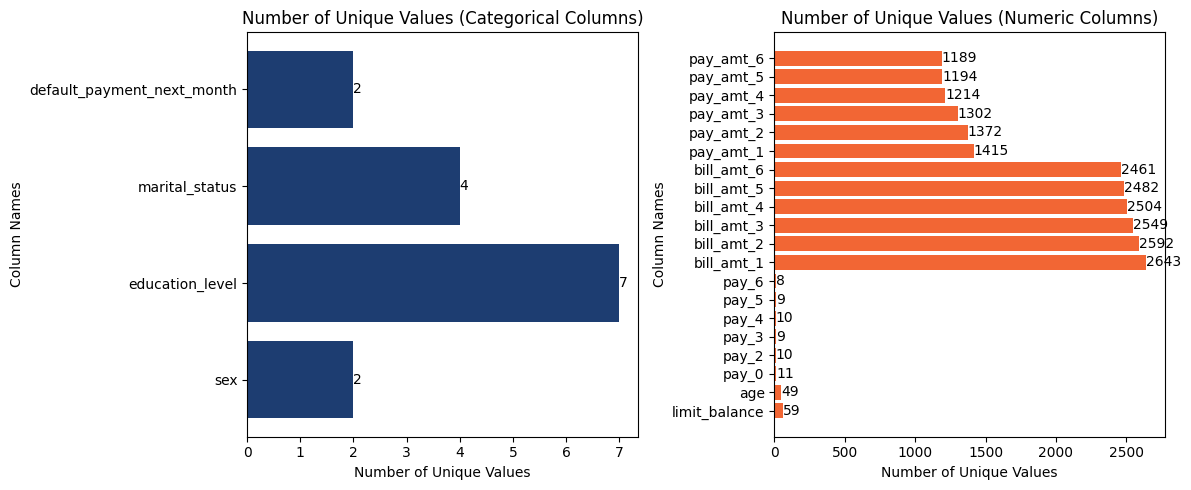

In [11]:

a = int_col.nunique()
b = flt_col.nunique()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars1 = plt.barh(int_col.columns, a, color='#1D3D71')  # Menggunakan columns dari int_col sebagai label sumbu y
plt.title('Number of Unique Values (Categorical Columns)')
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Names')

# Menambahkan nilai y pada grafik batang
for bar, count in zip(bars1, a):
    plt.text(count, bar.get_y() + bar.get_height() / 2, str(count), va='center')

plt.subplot(1, 2, 2)
bars2 = plt.barh(flt_col.columns, b, color='#F26634')  # Menggunakan columns dari flt_col sebagai label sumbu y
plt.title('Number of Unique Values (Numeric Columns)')
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Names')

# Menambahkan nilai y pada grafik batang
for bar, count in zip(bars2, b):
    plt.text(count, bar.get_y() + bar.get_height() / 2, str(count), va='center')

plt.tight_layout()
plt.show()

Terlihat semua data bertipe Interger adalah low cardinality. Selanjutnya saya akan cek, apasaja nilai unik dari data Interger dimana nunique <= 7

In [12]:
print('Data unik kolom low cardinality:\n')
for kolom in df.columns:
    if df[kolom].nunique() <= 7:
        print(f"kolom {kolom}:\n{df[kolom].unique()}")

Data unik kolom low cardinality:

kolom sex:
[1 2]
kolom education_level:
[6 4 1 2 3 5 0]
kolom marital_status:
[1 2 3 0]
kolom default_payment_next_month:
[1 0]


Di sini terlihat terdapat kategori numerik dalam dataset. Walaupun datanya berupa angka, namun sesungguhnya interpretasi dari kategori-kategori

# Cek Missing Value

Pertama saya akan cek apakah terdapat Missing Value pada dataset. Saya menggunakan metode subset, sehingga hanya menampilkan baris yang terdapat Missing Value (jika ada)

In [13]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

Tidak ditemukan Missing Value pada dataset. Selanjutnya saya akan mencari apakah ada Duplicate Value

# Cek duplicate Value

In [14]:
df[df.duplicated(keep=False)]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2806,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Saya hanya menampilkan baris yang terdapat Duplicate Value saja dengan fungsi keep= False dimana semua data baik aslinya maupun copynya dimunculkan. Lalu saelanjutnya saya akan melakukan drop datanya.

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(2964, 24)

# Exploratory Data Analysis (EDA)

## Cek Distribusi data

### Data Interger

Saya akan mulai dengan data interger, menggunakan looping

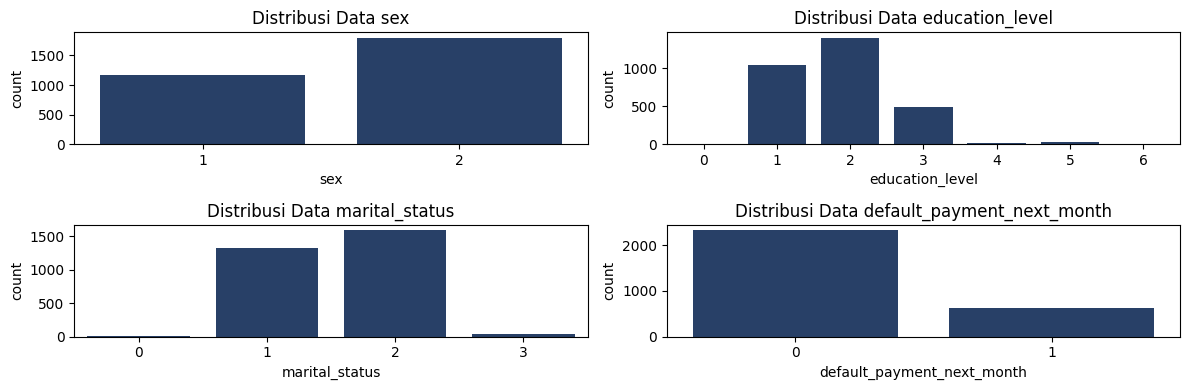

In [16]:

cols = len(int_col.columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, cols * 1))
axes = axes.flatten()  

for i, kolom in enumerate(int_col.columns):
    ax = sns.countplot(data=int_col, x=kolom, color= '#1D3D71', ax=axes[i])
    ax.set_title(f'Distribusi Data {kolom}')
    ax.set_xlabel(kolom)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)

plt.tight_layout()
plt.show()


Terlihat kolom education dan default payment_next_month imbalance. Tidak terdistribusi secara merata

### Data Float

Selanjutnya saya akan cek distribusi pada data Float.

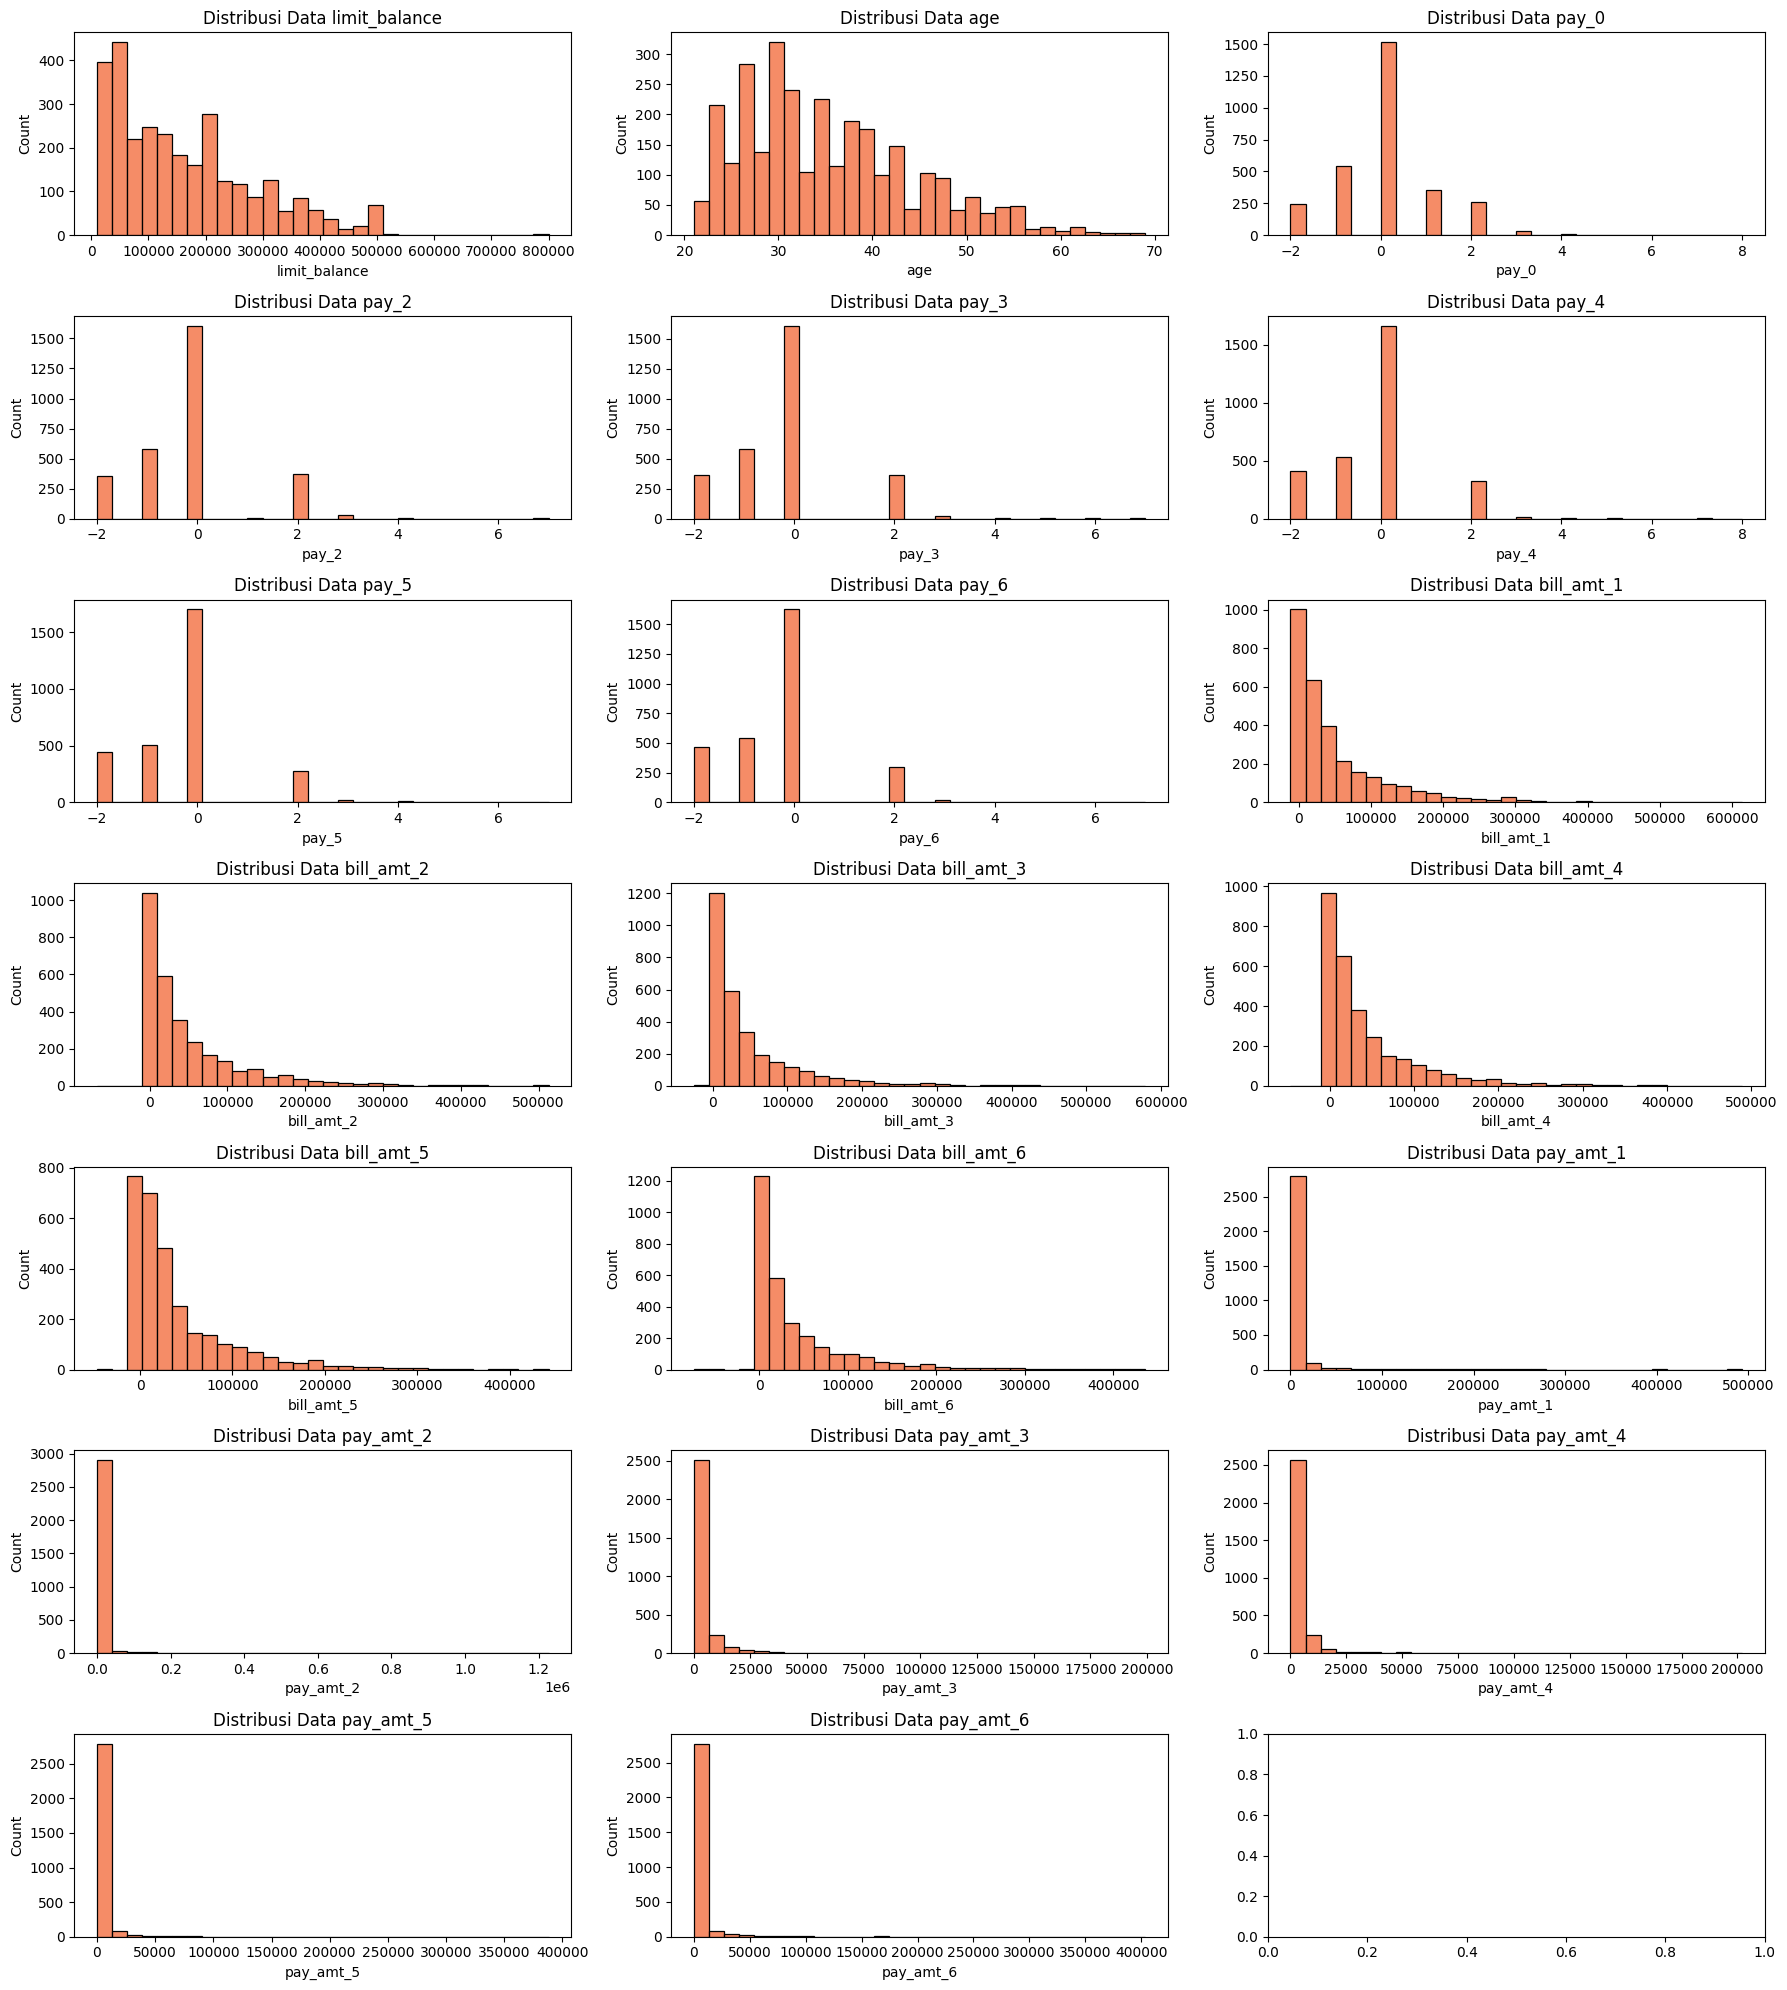

In [17]:
cols = len(flt_col.columns)
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 5 * 4)) 
axes = axes.flatten()

for i, kolom in enumerate(flt_col.columns):
    ax = sns.histplot(data=flt_col, x=kolom, color='#F26634', bins=30, ax=axes[i])
    ax.set_title(f'Distribusi Data {kolom}')
    ax.set_xlabel(kolom)

plt.tight_layout()
plt.show()

sekilas saya menilai:  
- Distribusi nilai limit kredit tampaknya skewed ke kanan dengan sebagian besar data berkumpul di nilai rendah.  
- Distribusi umur juga skewed ke kanan.  
- pay_0 - pay_6: Ini sepertinya adalah variabel kategorikal (beberapa pembayaran yang terlambat). 
- bill_amt1 - bill_amt6: Sepertinya ini adalah jumlah tagihan per bulan. Distribusi right-skewed untuk setiap bulan. Ada yang menarik di sini. Terlihat sebagian besar tagihan berkisar di nilai yang lebih rendah dan beberapa nilai yang sangat tinggi, yang menunjukkan adanya outlier.  
- pay_amt1 hingga pay_amt6: Terlihat cenderung right-skewed

## Deskripsi Umum Dataset

Saya akan cek angka-angka statistika dari setiap kolom.

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


## Visualisasi Distribusi Limit Balance berdasarkan Default Payment

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


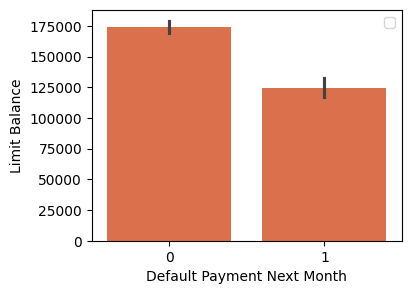

In [19]:

plt.figure(figsize=(4,3))
# ax = sns.histplot(data=flt_col, x=kolom, color='#F26634', bins=30, ax=axes[i])
ax= sns.barplot(data=df, x='default_payment_next_month', y='limit_balance', color='#F26634')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Limit Balance')
plt.title('Limit Balance Berdasarkan Default Payment')
plt.legend()
plt.show()

Terlihat Default Payment berdasarkan Limit Balance agak jauh dengan selisih 50rb

## Distribusi Default Payment Berdasarkan Education Level 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


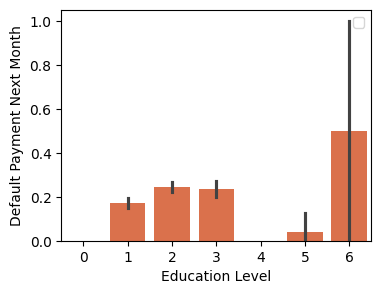

In [45]:
plt.figure(figsize=(4,3))
# ax = sns.histplot(data=flt_col, x=kolom, color='#F26634', bins=30, ax=axes[i])
ax= sns.barplot(data=df, x='education_level', y='default_payment_next_month', color='#F26634')
plt.xlabel('Education Level')
plt.ylabel('Default Payment Next Month')
plt.legend()
plt.show()

Terlihat education level kelas 5 terendah dan tertinggi kelas 6

## Cek Outliers

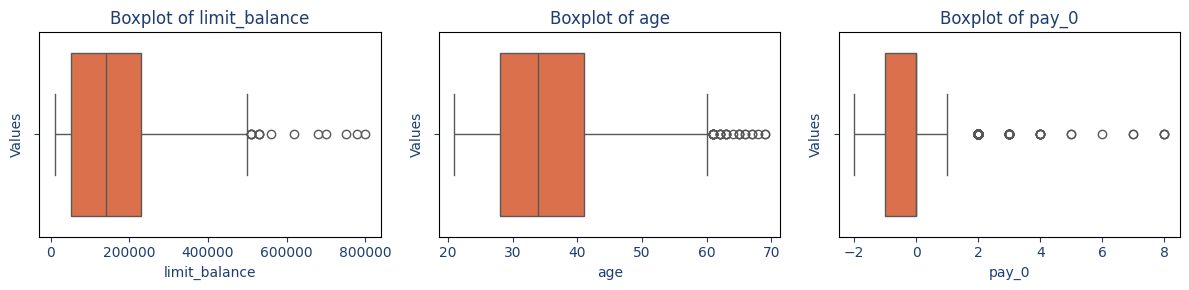

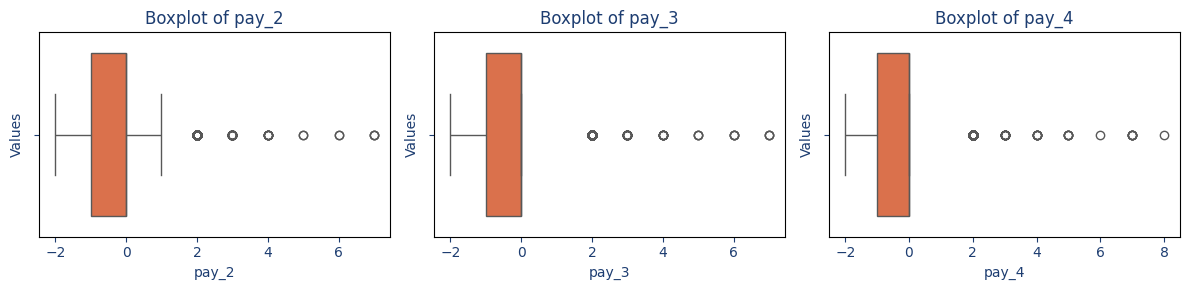

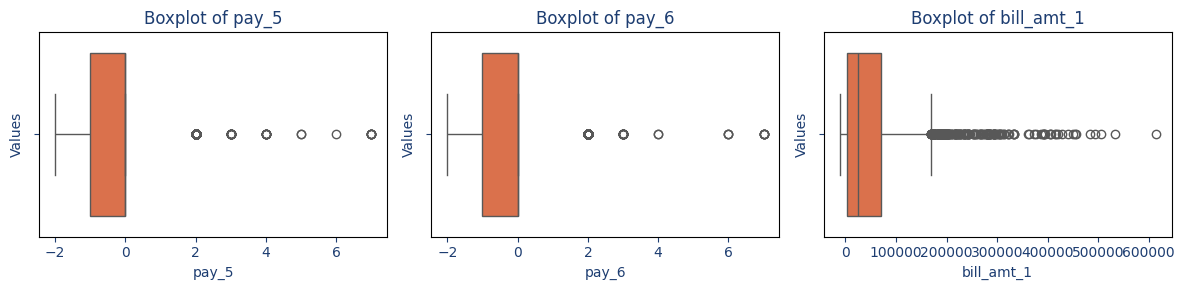

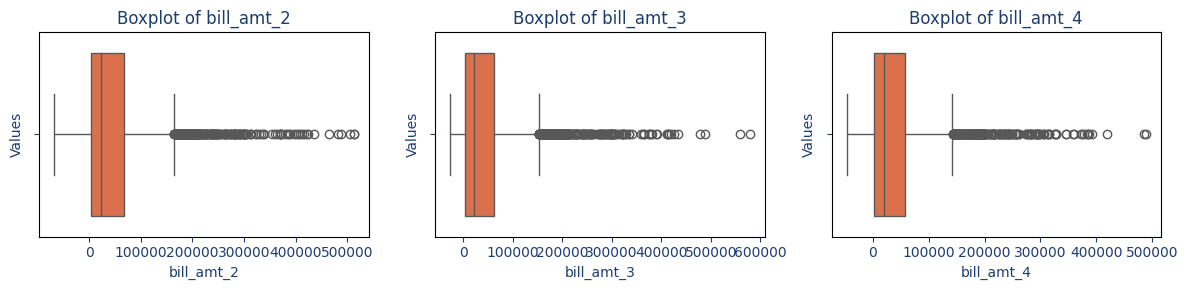

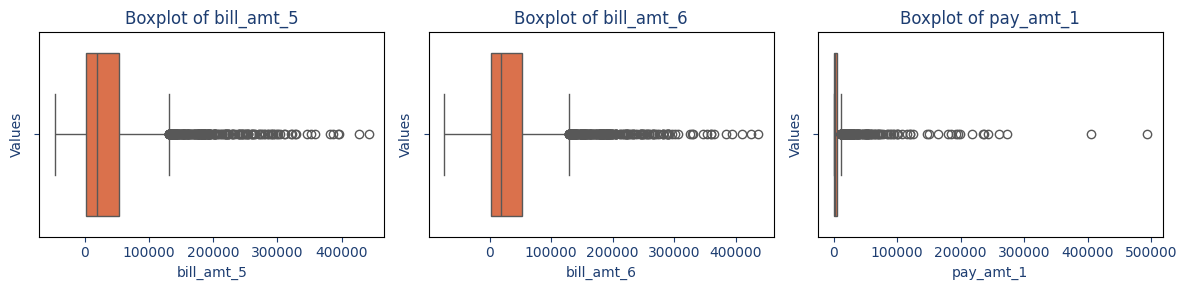

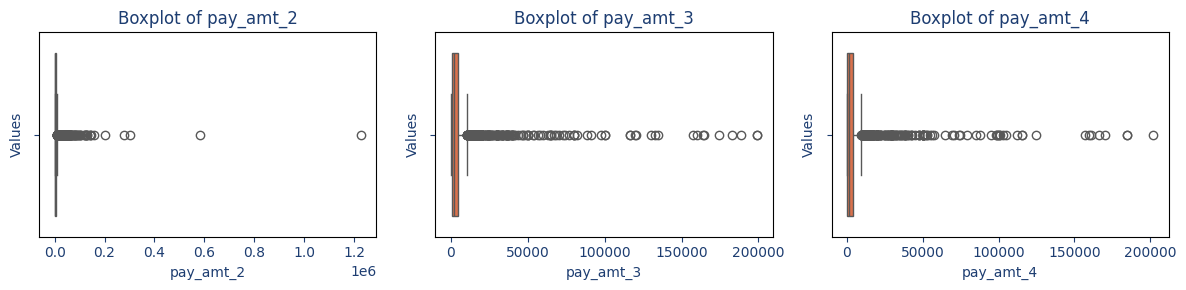

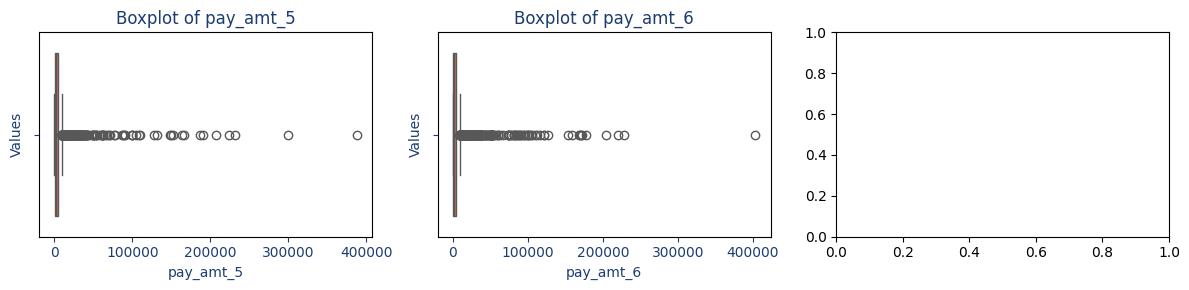

In [20]:
for i in range(0, 20, 3):
    cols = flt_col.columns[i:i+3] 

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))

    for j, kolom in enumerate(cols):
        sns.boxplot(x=flt_col[kolom], ax=axs[j], color='#F26634')
        axs[j].set_facecolor('white')
        axs[j].set_title(f'Boxplot of {kolom}', color='#1D3D71')
        axs[j].set_xlabel(kolom, color='#1D3D71')
        axs[j].set_ylabel('Values', color='#1D3D71')
        axs[j].tick_params(colors='#1D3D71')

    plt.tight_layout()
    plt.show()

Outliers sangat jelas terlihat hampir di setiap kolom

## Remove Outliers

Saya akan menghapus beberapa outliers, yang lain saya biarkan alami saja.

In [21]:
def outliers(outliers_col):
    Q1 = df[outliers_col].quantile(0.25)
    Q3 = df[outliers_col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_bound, upper_bound

    outlier_indices = df[df[outliers_col] > upper_bound].index
    clean_df = df.drop(outlier_indices)
    return clean_df
    
clean_df= outliers('limit_balance')
clean_df= outliers('age')
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2935 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2935 non-null   float64
 1   sex                         2935 non-null   int64  
 2   education_level             2935 non-null   int64  
 3   marital_status              2935 non-null   int64  
 4   age                         2935 non-null   float64
 5   pay_0                       2935 non-null   float64
 6   pay_2                       2935 non-null   float64
 7   pay_3                       2935 non-null   float64
 8   pay_4                       2935 non-null   float64
 9   pay_5                       2935 non-null   float64
 10  pay_6                       2935 non-null   float64
 11  bill_amt_1                  2935 non-null   float64
 12  bill_amt_2                  2935 non-null   float64
 13  bill_amt_3                  2935 non-n

In [22]:
print(f"ukuran data sebelumnya: {df.shape}. Ukuran data saat ini setelah dihapus outliers: {clean_df.shape}")

ukuran data sebelumnya: (2964, 24). Ukuran data saat ini setelah dihapus outliers: (2935, 24)


Selanjutnya saya akan cek korelasi dari semua kolam terhadap target (default_payment_next_month)

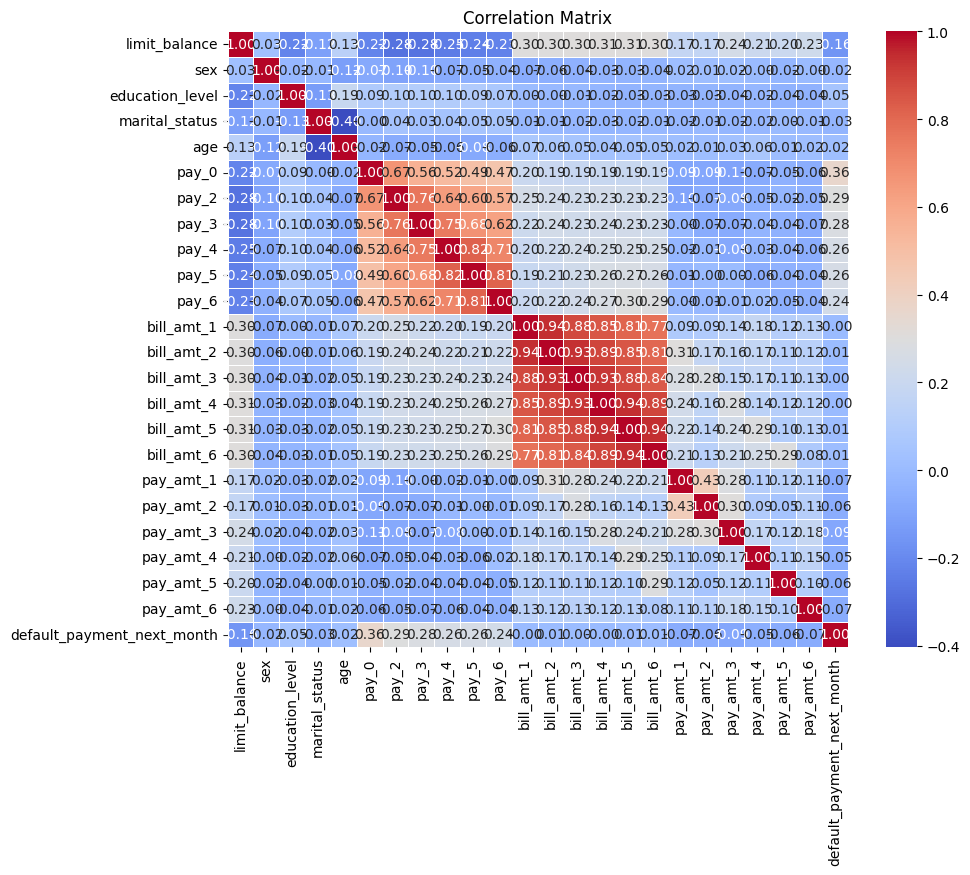

In [23]:
df_corr = clean_df.copy()
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Berikut adalah kolom2 berdasarkan Turkey's method

In [24]:
correlation_matrix[correlation_matrix['default_payment_next_month'] > 0.01]['default_payment_next_month'].sort_values(ascending=False)

default_payment_next_month    1.000000
pay_0                         0.359754
pay_2                         0.293018
pay_3                         0.280073
pay_4                         0.259332
pay_5                         0.257231
pay_6                         0.239057
education_level               0.048435
age                           0.018890
bill_amt_6                    0.011366
bill_amt_5                    0.010846
Name: default_payment_next_month, dtype: float64

# Feature Engineering

## Class Proportion (Imbalance Data)

Selanjutnya saya akan cek apakah kolom target imbalance

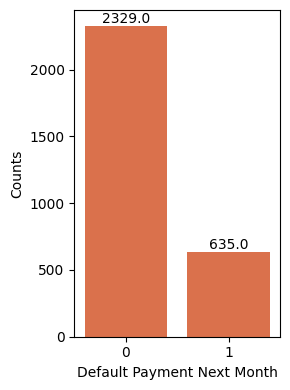

In [25]:
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=df, x='default_payment_next_month', color='#F26634')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Default Payment Next Month')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

Terlihat dengan jelas bahwa class 0 mendominasi. Sehingga data ini imbalance

## Split Data

Saya akan mulai Split Data

In [26]:
df_new = clean_df.copy()
df_new.drop(['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'], axis=1, inplace=True)
df_new.drop(['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], axis=1, inplace=True)
df_new

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


In [27]:
X = df_new.drop('default_payment_next_month', axis=1)
y = df_new['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Pipeline

Saya akan melakukan preprocessor dengan Standard Scaler. Karena tidak seperti di teori, data ini terbilang imbalance dan banyak outliers tetapi hasil terbaik pada encoding Standard Scaler

In [28]:
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['int64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder())  
# ])
categorical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model Definition

Saya akan mulai mendifinisikan model

In [29]:
# Menggabungkan preprocessor dengan model Logistic Regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Menggabungkan preprocessor dengan model SVM
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', SVC())])

# Menggabungkan preprocessor dengan model KNN
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Model Training

Saya mulai melakukan training pada data train

In [30]:
# Pelatihan Model Logistic Regression
model.fit(X_train, y_train)

# Pelatihan Model SVM
svm_model.fit(X_train, y_train)

# Pelatihan Model KNN
knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['sex', 'education_level', 'marital_status'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

Saya menggunakan Algoritma:  
- Logistic Regression
- SVM
- KNN

# Model Evaluation

Berikut adalah hasil evaluasinya

In [31]:
# Evaluasi Model Logistic Regression
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("\nEvaluasi Model Logistic Regression:")
print(f'Accuracy (Logistic Regression): {accuracy_lr:.4f}')
print('Confusion Matrix (Logistic Regression):\n', conf_matrix_lr)
print('\nClassification Report (Logistic Regression):\n', classification_report(y_test, y_pred_lr))


Evaluasi Model Logistic Regression:
Accuracy (Logistic Regression): 0.8348
Confusion Matrix (Logistic Regression):
 [[444  17]
 [ 80  46]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       461
           1       0.73      0.37      0.49       126

    accuracy                           0.83       587
   macro avg       0.79      0.66      0.69       587
weighted avg       0.82      0.83      0.81       587



Evaluasi Model Logistic Regression:
Accuracy (Logistic Regression): 0.8348
Confusion Matrix (Logistic Regression):
 [[444  17]
 [ 80  46]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       461
           1       0.73      0.37      0.49       126

    accuracy                           0.83       587
   macro avg       0.79      0.66      0.69       587
weighted avg       0.82      0.83      0.81       587


Evaluasi Model SVM:
Accuracy: 0.8450
Confusion Matrix:
 [[439  22]
 [ 69  57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       461
           1       0.72      0.45      0.56       126

    accuracy                           0.84       587
   macro avg       0.79      0.70      0.73       587
weighted avg       0.83      0.84      0.83       587

In [32]:
# Evaluasi Model SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nEvaluasi Model SVM:")
print(f'Accuracy: {accuracy_svm:.4f}')
print('Confusion Matrix:\n', conf_matrix_svm)
print('\nClassification Report:\n', classification_report(y_test, y_pred_svm))


Evaluasi Model SVM:
Accuracy: 0.8450
Confusion Matrix:
 [[439  22]
 [ 69  57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       461
           1       0.72      0.45      0.56       126

    accuracy                           0.84       587
   macro avg       0.79      0.70      0.73       587
weighted avg       0.83      0.84      0.83       587



In [33]:
# Evaluasi Model KNN
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("\nEvaluasi Model KNN:")
print(f'Accuracy: {accuracy_knn:.4f}')
print('Confusion Matrix:\n', conf_matrix_knn)
print('\nClassification Report:\n', classification_report(y_test, y_pred_knn))


Evaluasi Model KNN:
Accuracy: 0.8160
Confusion Matrix:
 [[427  34]
 [ 74  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       461
           1       0.60      0.41      0.49       126

    accuracy                           0.82       587
   macro avg       0.73      0.67      0.69       587
weighted avg       0.80      0.82      0.80       587



Evaluasi:  
Model SVM cukup tinggi dengan detail sebagai berikut:  
Akurasi (Accuracy): 84.50%  
Precision untuk kelas 0: 86%  
Recall untuk kelas 0: 95%  
F1-Score untuk kelas 0: 91%  
Precision untuk kelas 1: 72%  
Recall untuk kelas 1: 45%  
F1-Score untuk kelas 1: 56%  

Saya akan ambil evaluasi F1-Score karena sejatinya data ini banyak outliers dan juga distribusi labelnya tidak rata.

# Model Saving

Saya akan save model

In [34]:
# Simpan model SVM ke dalam file 
filename = '/Users/qaisahmad/Documents/GitHub/GC/p1-ftds027-rmt-g5-qaisahmaddd/deployment/model.pkl'
# joblib.dump(model, filename)
# print(f'Model SVM saved as {filename}')

with open(filename, "wb") as f:
    pickle.dump(model, f)

print(f'Model SVM saved as {filename}')

Model SVM saved as /Users/qaisahmad/Documents/GitHub/GC/p1-ftds027-rmt-g5-qaisahmaddd/deployment/model.pkl


# Model Inference

Dan sekarang saya akan melakukan predict dengan data test

In [35]:
# Load model SVM dari file
svm_model = joblib.load('/Users/qaisahmad/Documents/GitHub/GC/p1-ftds027-rmt-g5-qaisahmaddd/deployment/model.pkl')

sample_data = X_test.iloc[:100]
predictions = svm_model.predict(sample_data)

# Analisis Hasil Inferensi
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Label'])

# Menganalisis hasil prediksi
print(predictions_df['Predicted_Label'].value_counts())

Predicted_Label
0    85
1    15
Name: count, dtype: int64


In [57]:
print('Berikut adalah hasilny:')
y_test.iloc[:100].value_counts()

Berikut adalah hasilny:


default_payment_next_month
0    77
1    23
Name: count, dtype: int64

85 prediksi masuk ke kelas 0.  
15 prediksi masuk ke kelas 1.  

Aslinya:  
77 kelas 0.  
23 kelas 1.  

# Pengambilan Kesimpulan

Saya sudah sampai di tahapan akhir dimana saya akan meringkas pekerjaan di atas:  
1. Dataset yang digunakan sulit dipahami oleh awam.  
2. Distribusi dataset tidak bisa dibilang normal.  
3. Dataset memiliki sangat banyak outliers, sehingga pemilihan model dan evaluasi harus hati-hati.  
4. Hanya ada 1 data duplika, dan tidak ada missing Value.  
5. Awalnya saya mengira tingkat pendidikan berkorealasi tinggi dengan target. Tapi ternyata tidak.  
6. Model telah ditetapkan dengan SVM dan F1-Score sebagai metode evaluasinya. Karena tidak ada tendensi, model harus dihadapkan dengan keadaan seperti apa. Di tambah dengan banyaknya outliers dan imbalance data, maka F1-Score menurut saya adalah pilihan yang tepat.
7. Model ini akan jauh lebih baik jika disempurnakan kolomnya seperti data penghasilan nasabah dan domisili.
8. Model ini menurut saya sudah bisa mewakili dataset yang ada.